#### 베르누이-가우시안 혼합모형

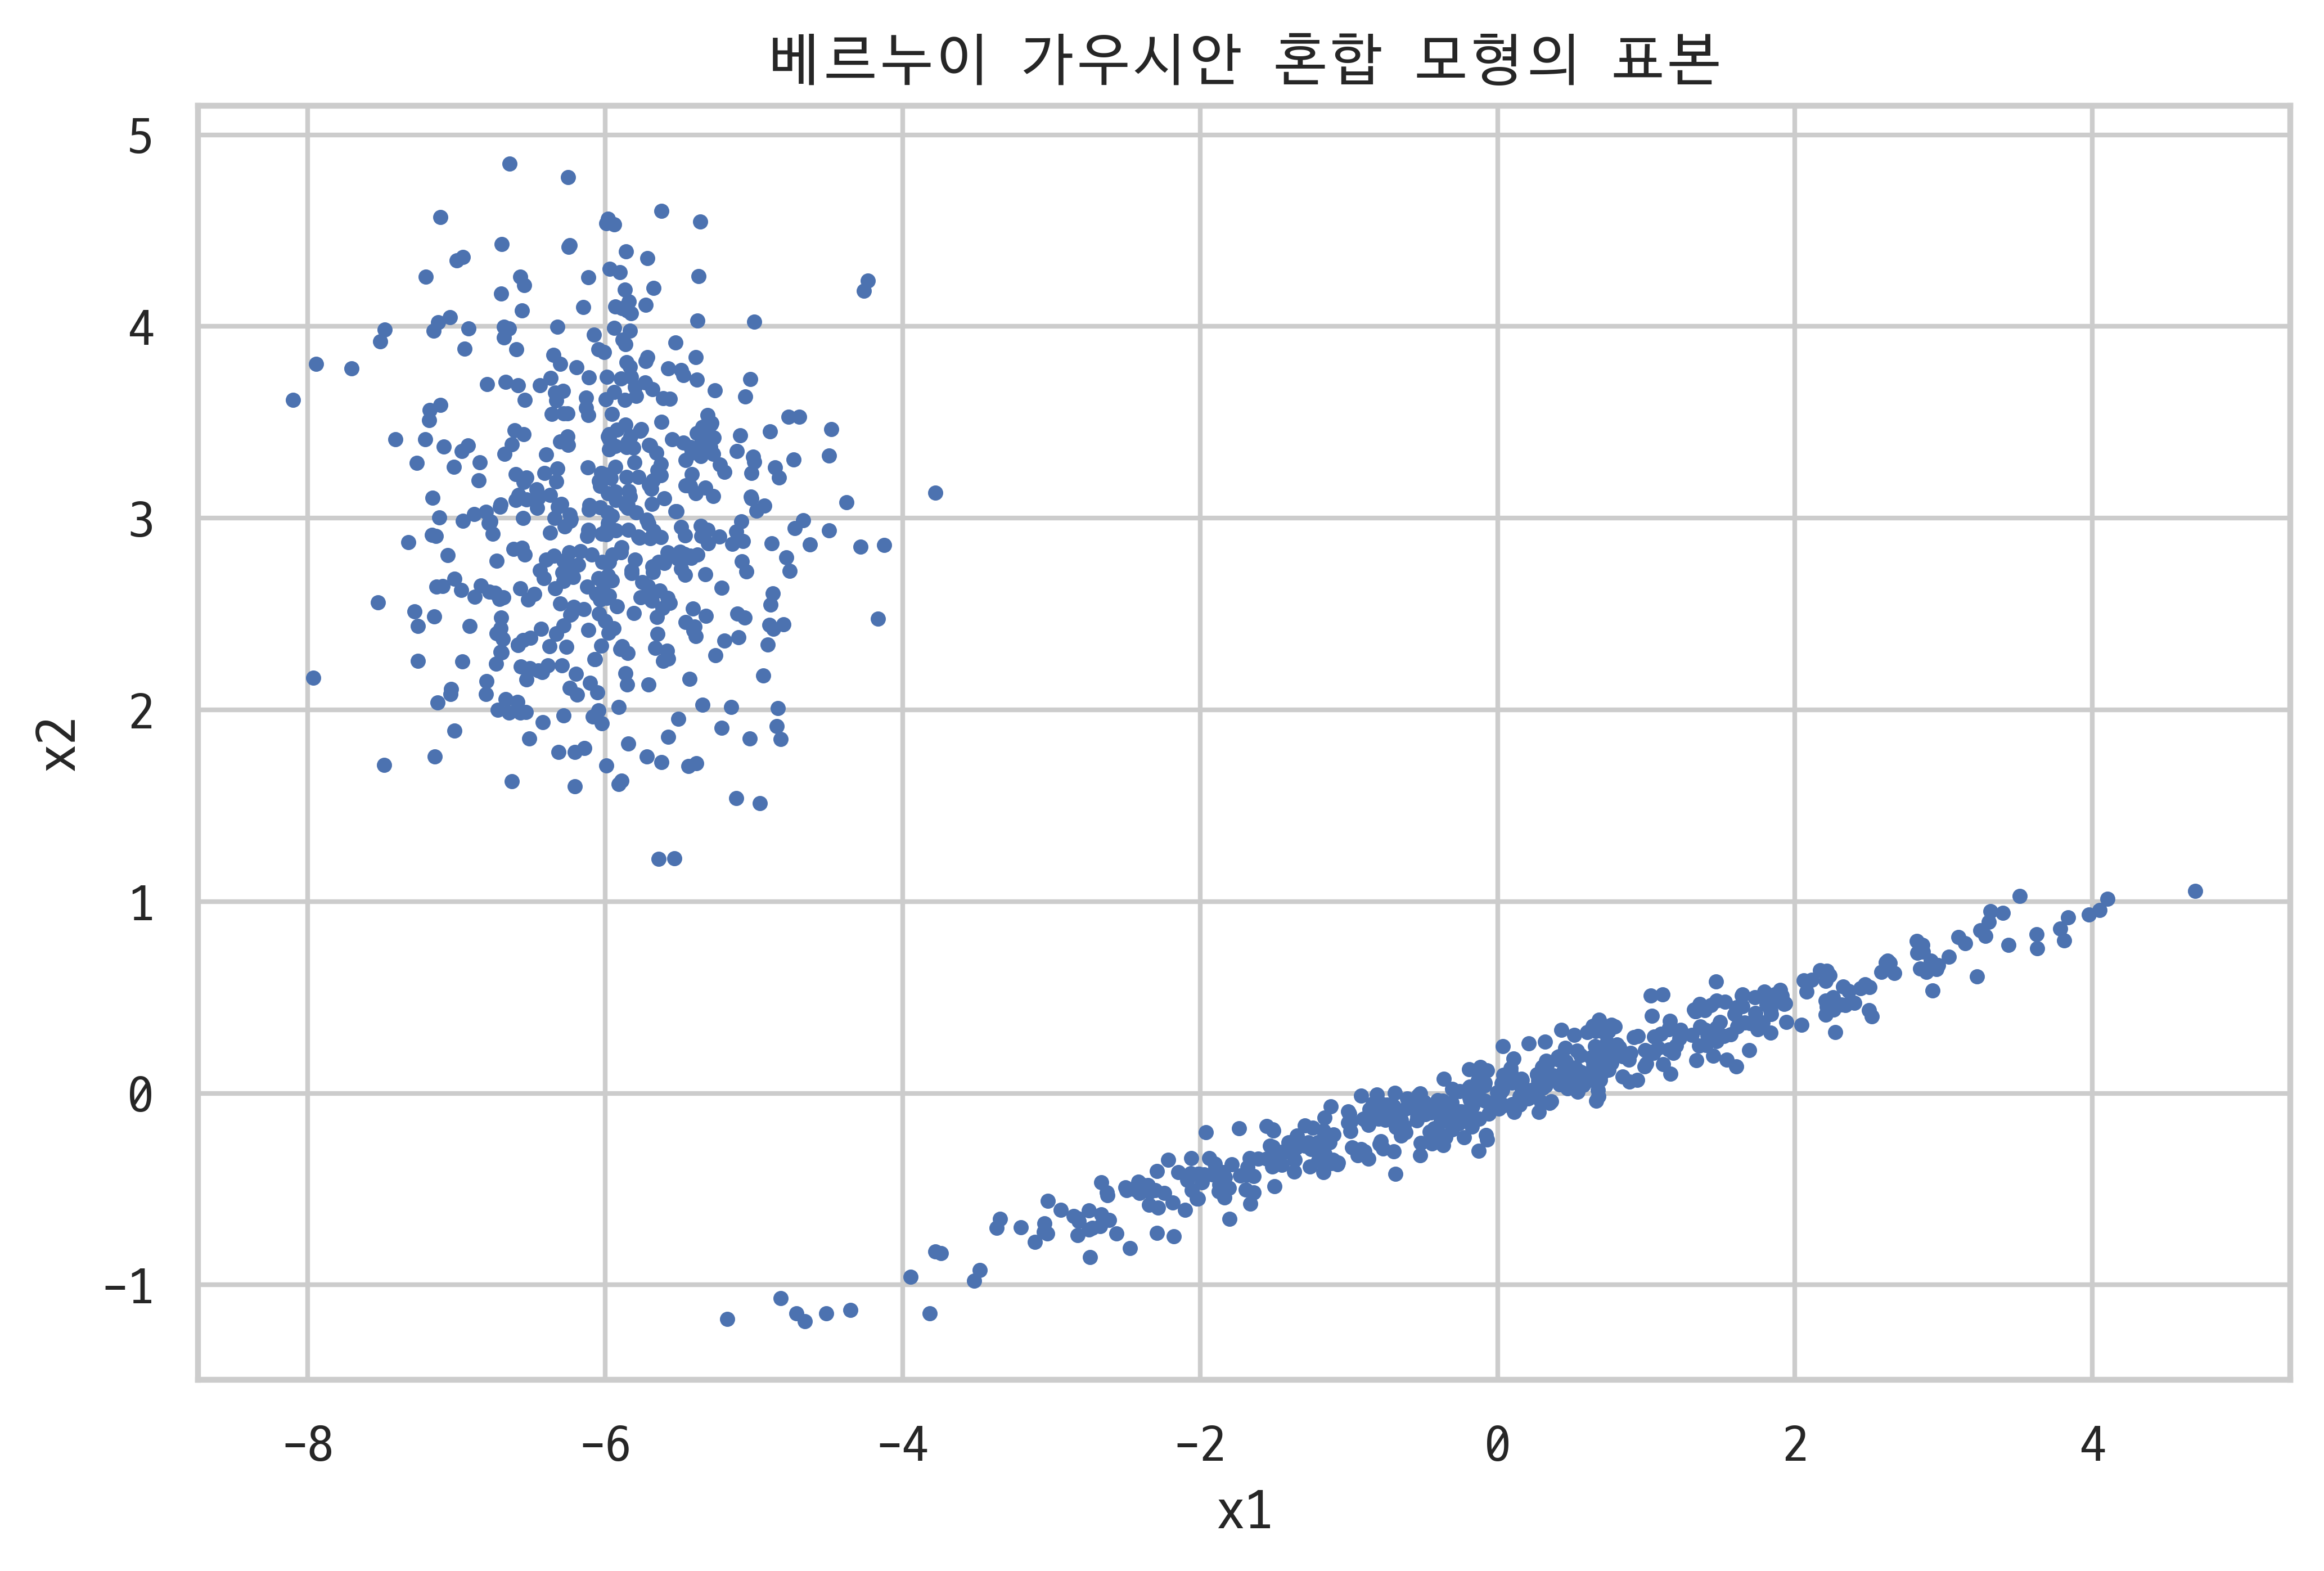

In [1]:
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, 0.4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1, 
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('베르누이 가우시안 혼합 모형의 표본')
plt.show()

#### Sciit-Learn의 GaussianMixture 클래스

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def plot_guassianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n)
    with ignore_warnings(category=ConvergenceWarning):
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, lw=1, edgecolors='b', cmap=plt.cm.binary, c=pi[:, 0])
    plt.title('iteration: {}'.format(n))

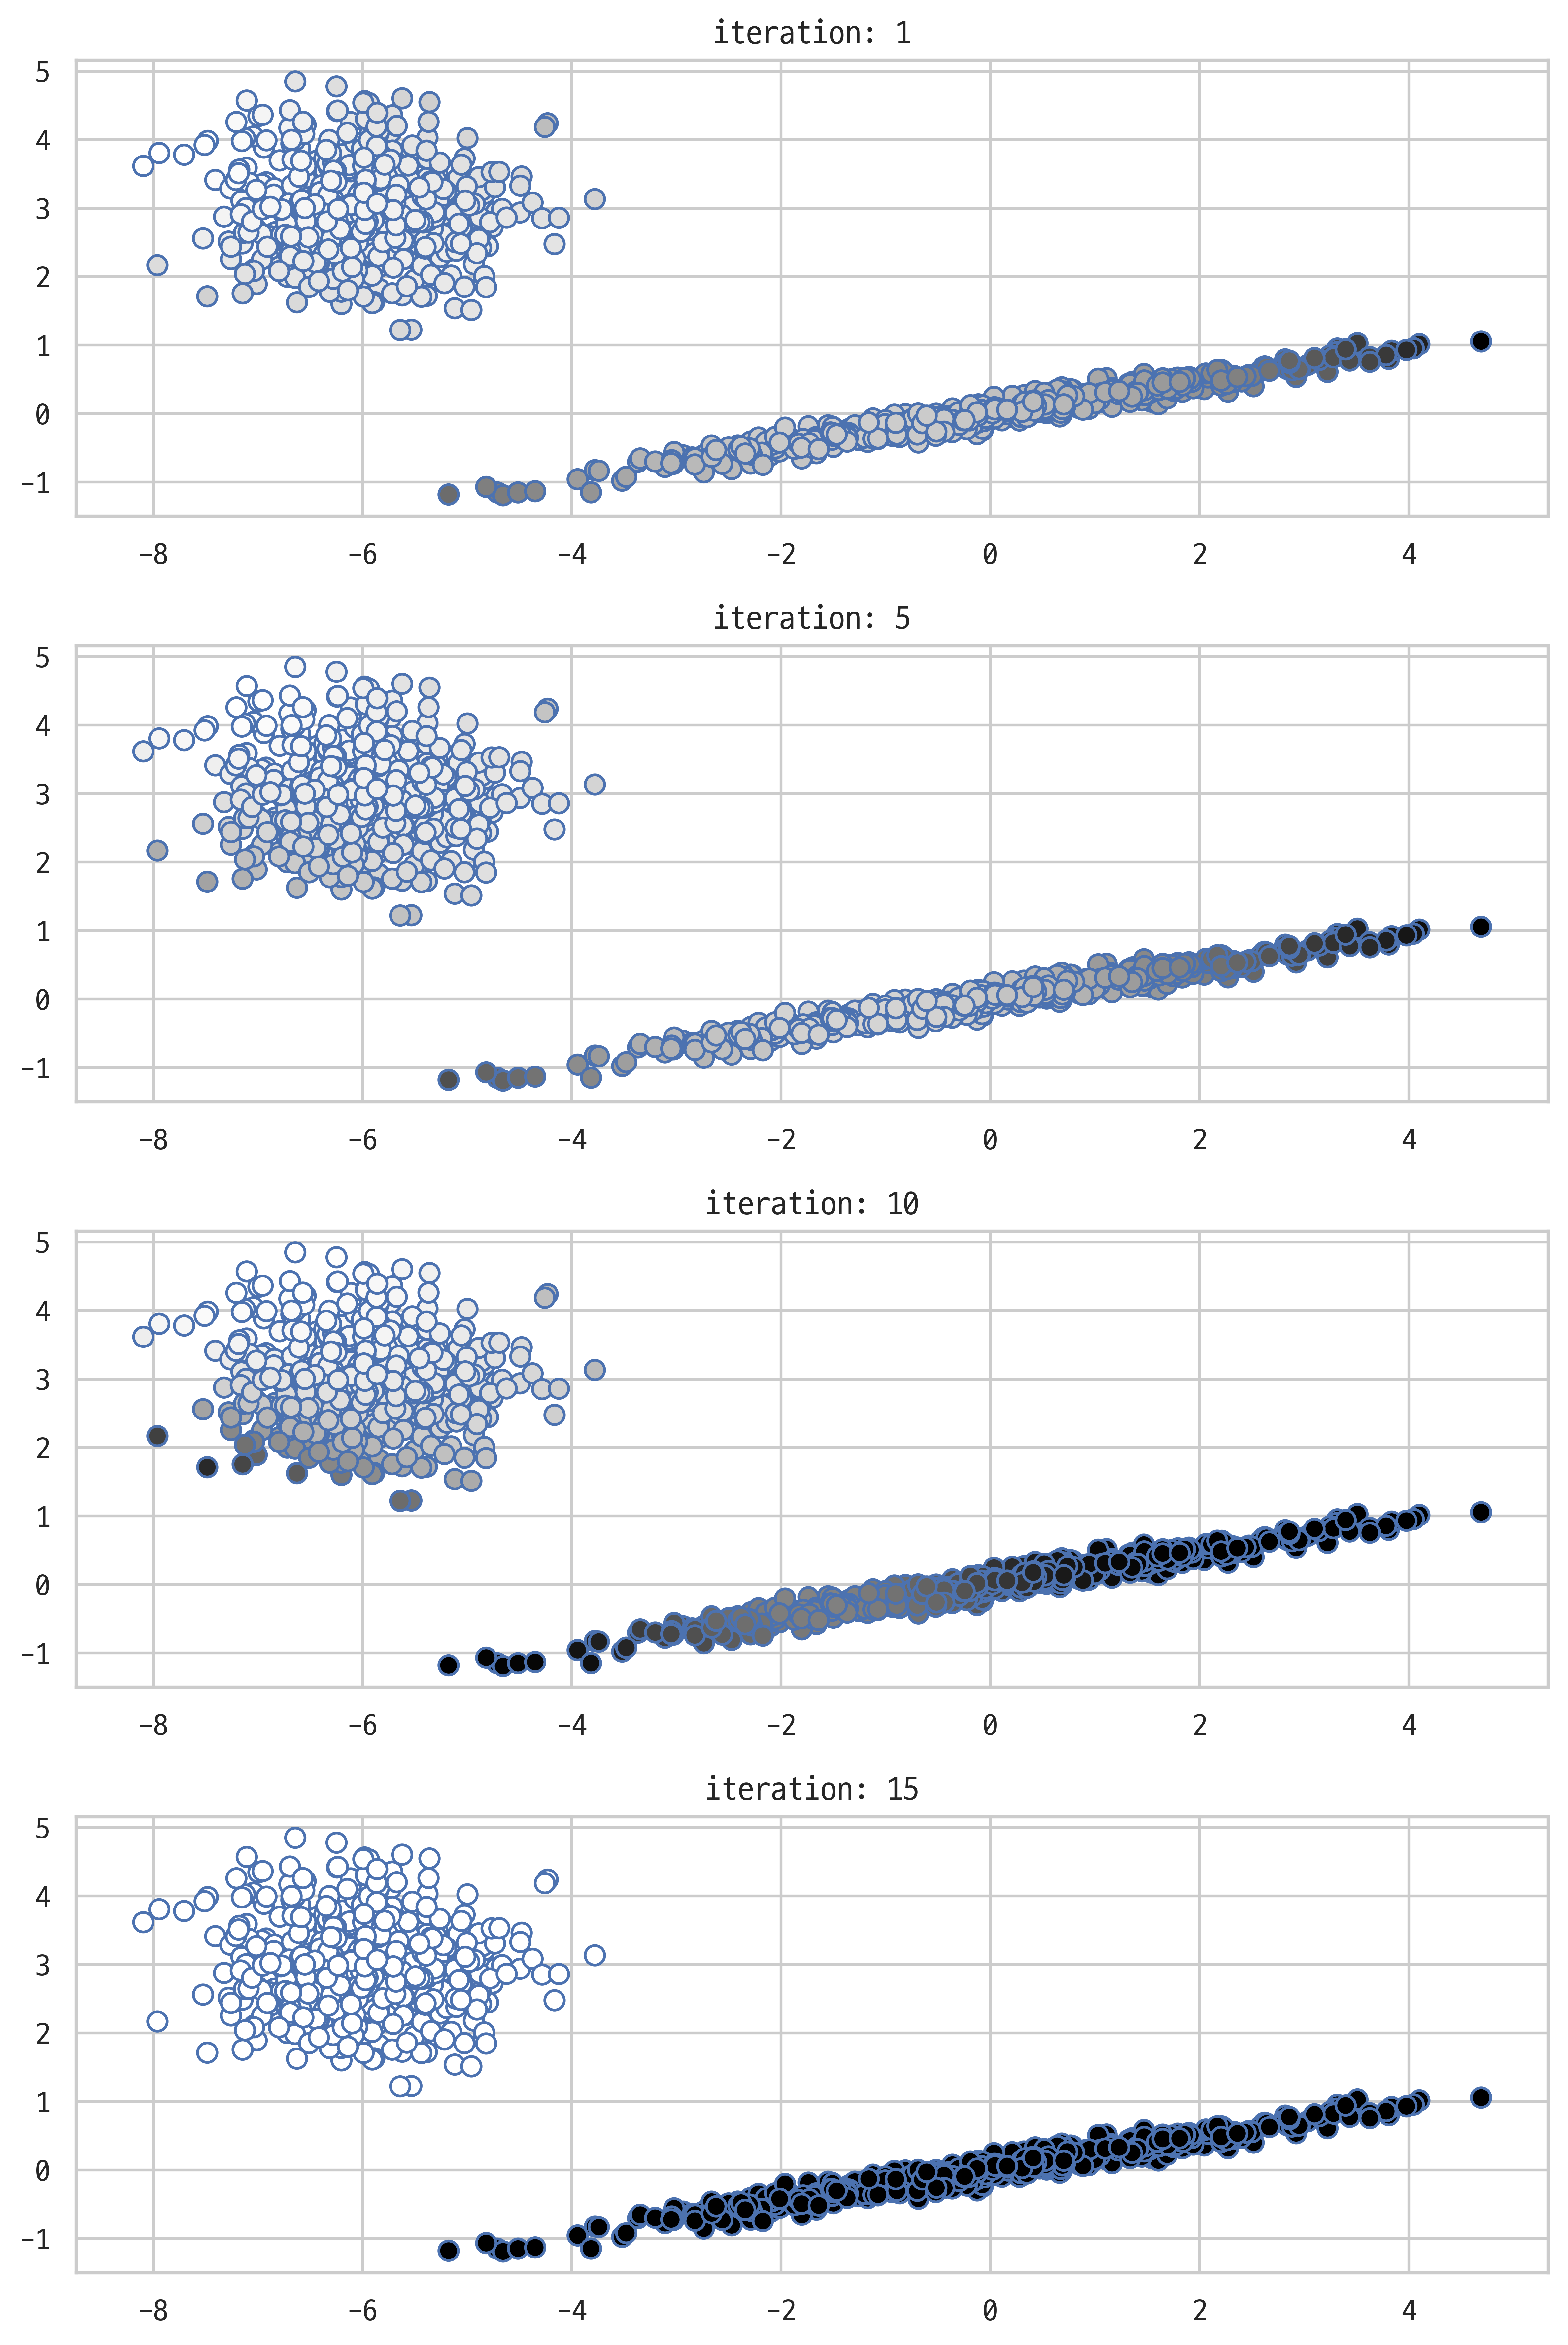

In [5]:
plt.figure(figsize=(8, 12))
plt.subplot(411)
plot_guassianmixture(1)
plt.subplot(412)
plot_guassianmixture(5)
plt.subplot(413)
plot_guassianmixture(10)
plt.subplot(414)
plot_guassianmixture(15)
plt.tight_layout()
plt.show()